# Workshop 1: analysis of natural language using string objects

Basic string operations

In [ ]:
s = "Hi my name is MYNAMEHERE, how are you?"
print(s)
print(len(s))

## import file(s)
my life story with stings and file import HERE

In [ ]:
import os
wd = os.getcwd()
print(wd)

In [ ]:
fileobjects = sorted(os.listdir(wd + "/DATA"))
fname = fileobjects[0]
with open("DATA/" + fname, 'r') as f:
    s = f.read()


In [30]:
import re
content = re.sub(r"\d","",s)# remove numbers
content = content.lower()# case folding

## Tokenization

In [33]:
tokenizer = re.compile(r"\W+")# split text into words
unigrams = tokenizer.split(content)

clean_unigrams = []
for unigram in unigrams:
    if len(unigram) > 1:
        clean_unigrams.append(unigram)
        
print(len(clean_unigrams))

187064


## Import sentiment dictionary

In [35]:
import pandas as pd

labmt = pd.read_csv('TOOLS/labmt_dict.csv',sep='\t', encoding='utf-8', index_col=0)
labmt.head()

avg = labmt.happiness_average.mean()
sent_dict = (labmt.happiness_average - avg).to_dict()

sent_vec = []
for unigram in clean_unigrams:
    sent_vec.append(sent_dict.get(unigram,0.0))


## Plot sentiment vector at word level

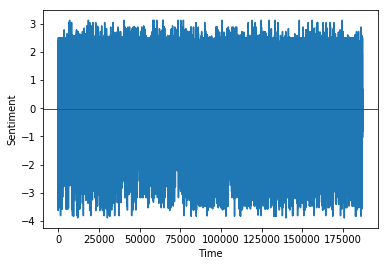

In [37]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sent_vec)
ax.axhline(y = np.mean(sent_vec), c="r",linewidth=1)
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment')

plt.show()
plt.close()


## slice text in slices of 100 words

In [39]:
def slicer(input, n = 100, cut_off = False):
    """
    slice tokenized text in slices of n tokens
    - end cut off for full length normalization
    """
    slices = []
    for i in range(0,len(input),n):
        slices.append(input[i:(i+n)])
    if cut_off:
        del slices[-1]
    return slices

slices = slicer(clean_unigrams)

print(slices[5])

['would', 'contain', 'much', 'etymological', 'information', 'on', 'the', 'languages', 'particularly', 'on', 'the', 'elven', 'tongues', 'with', 'large', 'vocabulary', 'it', 'proved', 'the', 'chief', 'cause', 'of', 'the', 'delay', 'in', 'publishing', 'volume', 'three', 'which', 'in', 'the', 'end', 'contained', 'no', 'index', 'at', 'all', 'only', 'an', 'apology', 'from', 'the', 'publisher', 'for', 'its', 'absence', 'for', 'tolkien', 'had', 'abandoned', 'work', 'on', 'it', 'after', 'indexing', 'volumes', 'one', 'and', 'two', 'believing', 'its', 'size', 'and', 'therefore', 'its', 'cost', 'to', 'be', 'ruinous', 'volume', 'three', 'the', 'return', 'of', 'the', 'king', 'finally', 'appeared', 'in', 'england', 'on', 'october', 'and', 'in', 'the', 'united', 'states', 'on', 'january', 'with', 'the', 'appearance', 'of', 'the', 'third', 'volume', 'the', 'lord', 'of', 'the']


## apply sentiment analysis to each slice and sum sentiment values for slices

In [40]:
def sentiment_score(unigrams):
    labmt = pd.read_csv('TOOLS/labmt_dict.csv',sep='\t', encoding='utf-8', index_col=0)
    avg = labmt.happiness_average.mean()
    sent_dict = (labmt.happiness_average - avg).to_dict()
    sent_vec = []
    for unigram in unigrams:
        sent_vec.append(sent_dict.get(unigram,0.0))
    return(sent_vec)

sent_vec = []
for slc in slices:
    sent_vec.append(sum(sentiment_score(slc)))

## Plot slices (as before with words)

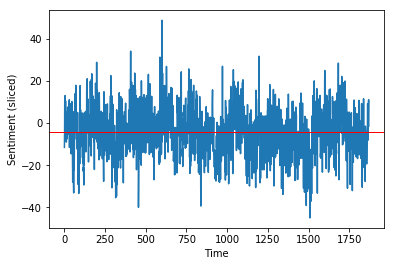

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sent_vec)
ax.axhline(y = np.mean(sent_vec), c="r",linewidth=1)
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment (sliced)')

plt.show()
plt.close()


## plot smoothed sentiment vector

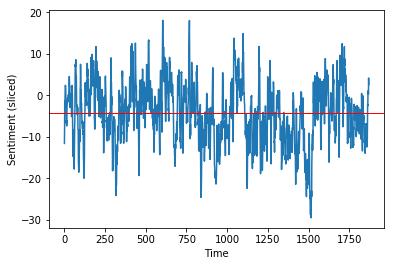

In [42]:
def smooth(l, n = 5):
    """moving average filter with window size n"""
    sigma = 0
    res = list( 0 for x in l)
    for i in range(0 , n):
        sigma = sigma + l[i]
        res[i] = sigma / (i + 1)
    for i in range( n, len(l) ):
        sigma = sigma - l[i - n] + l[i]
        res[i] = sigma / n
    return res

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(smooth(sent_vec))
ax.axhline(y = np.mean(smooth(sent_vec, n = 10)), c="r",linewidth=1)
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment (sliced)')

plt.show()
plt.close()